#### Importing all the necessary libraries for further analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

#### Loading employee dataset

In [2]:
df = pd.read_csv('dataset.csv')

#### Running the head, shape and info functions to inspect the data

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.shape

(14999, 10)

#### We can see that there are 14999 records and 10 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [7]:
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

#### We can see that none of the columns contain null values. However, it seems that the 'sales' column must be renamed to something like 'department' to better explain the data it cointains. Lets run the rename function and change its name. 

In [8]:
df = df.rename(columns={'sales': 'department'})

In [9]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [10]:
df.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

#### I'm also noting that we could start reducing the dimention of the dataset by aggregating some some columns. For instance the 'support' and 'IT' columns could easily fit into the 'technical'. Lets run the numpy function 'where' to achieve that. 

In [11]:
df['department'] = np.where(df['department'] == 'support', 'technical', df['department'])
df['department'] = np.where(df['department'] == 'IT', 'technical', df['department'])

In [12]:
df.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'management',
       'product_mng', 'marketing', 'RandD'], dtype=object)

#### Double checking for null values in the dataset

In [13]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

#### Lets find out how many types of values does the salary column have by running the value_counts function.

In [14]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

#### The 'department' and 'salary' columns contain categorical nominal and ordinal data, so lets apply some one hot encoding to convert its values into numerical data. 

In [15]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1

In [16]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,...,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0


#### We took care of the categorical data now, so lets drop the 'department' and 'salary' columns because we don't need it anymore. 

In [17]:
df.drop(['department', 'salary'], inplace=True, axis=1)

In [18]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


#### We finished with the cleaning and transforming of the dataset. Lets now check for multicolinearity by creating a heatmap to see if there's any correlation between the features and the target variable ('left').

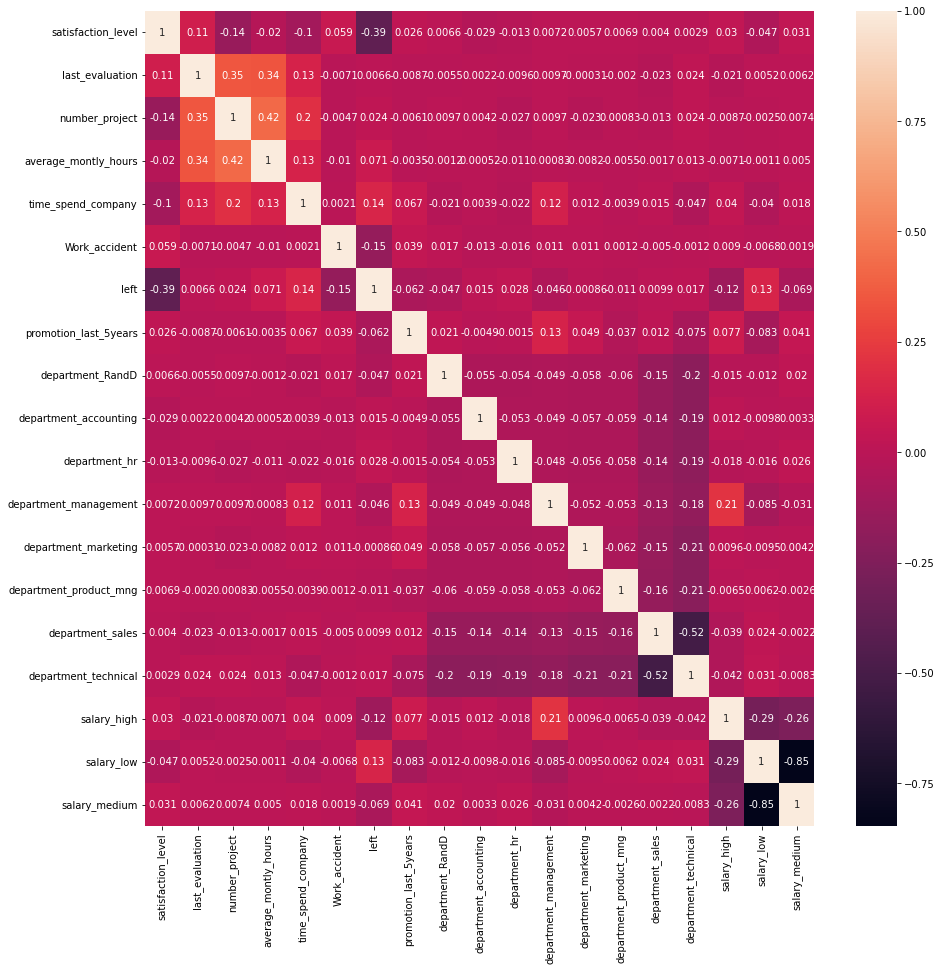

In [19]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True);

#### Lets create our dependent and independent variables. Our target variable is 'left', and the features are the rest. 

In [21]:
X = [x for x in df.columns if x != 'left']
y = ['left']

X = df[X]
y = df[y]

In [22]:
print(X.shape)
print(y.shape)

(14999, 18)
(14999, 1)


#### Running the StandardScaler to transform the data to avoid any bias before the model fitting. 

In [23]:
sc = StandardScaler()
X = sc.fit_transform(X)

#### Lets run the train test split library to separate our dataset into training and testing sets. 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### For performance's sake, lets change the y_train and y_test variables to y_train values and y_test values.

In [25]:
y_train, y_test = y_train.values, y_test.values

#### Printing the shape of every variable to double check their dimention. 

In [26]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (11999, 18)
X_test shape:  (3000, 18)
y_train.shape:  (11999, 1)
y_test shape:  (3000, 1)


### This is a classification problem, so lets start with the Logistich Regression algorithm, and lets also use the recursive feature elimination module for feature selection. And finally lets train the data. 

In [38]:
lg = LogisticRegression()
rfe = RFE(estimator=lg, step=10)


rfe.fit(X_train, y_train.ravel())

RFE(estimator=LogisticRegression(), step=10)

### Lets run the predict function and run some scoring tests

In [29]:
pred = rf.predict(X_test)

----------------------------------------------------Accuracy------------------------------------------------------
0.786

---------------------------------------------------Classification Report---------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.58      0.34      0.43       706

    accuracy                           0.79      3000
   macro avg       0.70      0.63      0.65      3000
weighted avg       0.76      0.79      0.76      3000


-------------------------------------------------Confusion Matrix----------------------------------------------------


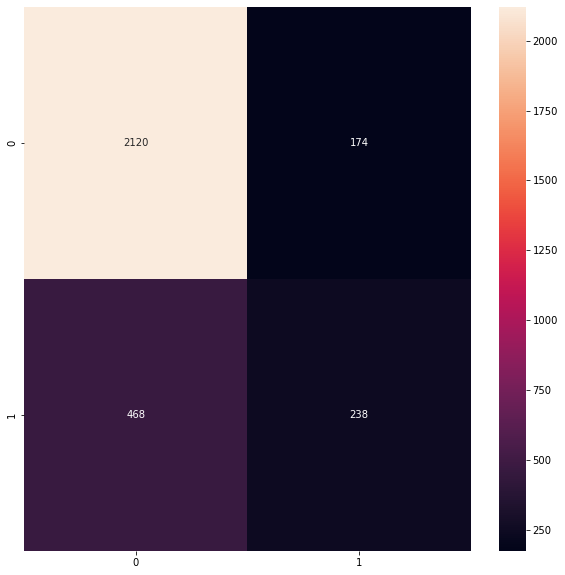

In [31]:
print("----------------------------------------------------Accuracy------------------------------------------------------")
print(accuracy_score(y_test, pred))
print()

print("---------------------------------------------------Classification Report---------------------------------------------")
print(classification_report(y_test, pred))
print()

print("-------------------------------------------------Confusion Matrix----------------------------------------------------")
plt.figure(figsize=(10, 10));
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');

#### As we can see, our model has 78.6% of accuracy and an 87% F1 score for predicting the ones who stayed in the company, and a 43% F1 score for the ones who left. As far as the confusion matrix, our model went pretty good with the true positives (2120 vs 174) but not so good with the true negatives (238 vs 468)

### Lets now run the random forest classifier ensemble algorithm to further investigate if we can get better scoring result therefore have a better predicting model. 

In [32]:
rf = RandomForestClassifier()

In [34]:
rf.fit(X_train, y_train.ravel())

RandomForestClassifier()

In [35]:
pred1 = rf.predict(X_test)

----------------------------------------------------Accuracy Score---------------------------------------------------
0.988

---------------------------------------------------Classification Report---------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000


-------------------------------------------------Confusion Matrix----------------------------------------------------


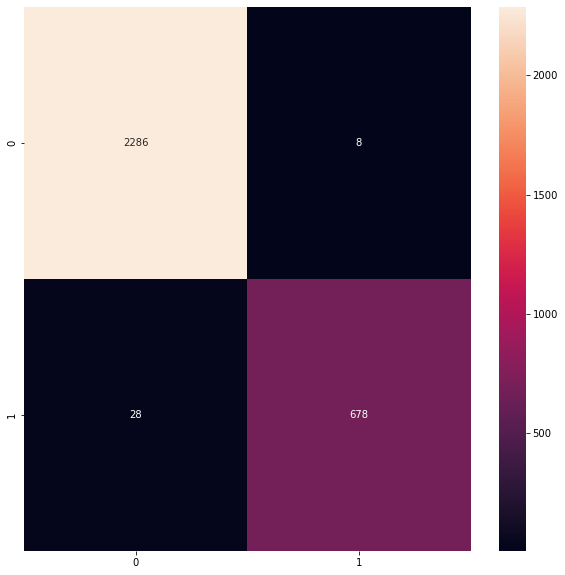

In [40]:
print("----------------------------------------------------Accuracy Score---------------------------------------------------")
print(accuracy_score(y_test, pred1))
print()

print("---------------------------------------------------Classification Report---------------------------------------------")
print(classification_report(y_test, pred1))
print()

print("-------------------------------------------------Confusion Matrix----------------------------------------------------")
plt.figure(figsize=(10, 10));
sns.heatmap(confusion_matrix(y_test, pred1), annot=True, fmt='g');

#### With the Random Forest Classifier algorithm we got an almost perfect model with an staggering accuracy score of 98.8% and a pretty good F1 score too. The confusion matrix have a pretty good true negatives and true positives ratio.